In [1]:
#Intially we import the necessary libraries to read and display the csv file for spam detection
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('drive')
df=pd.read_csv("drive/My Drive/spam data/spam.csv",encoding="ISO-8859-1")
df.sample(5)

Mounted at drive


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2602,ham,So when you gonna get rimac access,NaN,NaN,NaN
4028,ham,"[Û_] anyway, many good evenings to u! s",NaN,NaN,NaN
4673,ham,I'm leaving my house now.,NaN,NaN,NaN
5498,ham,Why did I wake up on my own &gt;:(,NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN


In [2]:
df.shape

(5572, 5)

Steps to follow
#Data Cleaning
#EDA
#Text Pre Processing
#Model Building
#Evaluation
#Improvement
#Website


## 1.Data Cleaning
We basically clear the last three columns in the data given above as there is a lot of non-null values which are not present in these columns . We can't use this data to process data or build a model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2434,ham,Uncle boye. I need movies oh. Guide me. Plus y...
124,ham,ÌÏ predict wat time Ì_'ll finish buying?
440,ham,Yes..he is really great..bhaji told kallis bes...
1873,spam,You have WON a guaranteed å£1000 cash or a å£2...
1080,ham,You tell what happen dont behave like this to ...


In [5]:
#renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
5326,ham,What makes you most happy?
4188,ham,"Well the general price is &lt;#&gt; /oz, let ..."
4743,ham,"\Thinking of u ;) x\"""""
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,..."
4714,ham,S:)8 min to go for lunch:)


In [6]:
#Converting spam/ham to binary values like 1/0
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Missing Values
df.isnull().sum()

,0
Target,0
Text,0


In [8]:
#Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [9]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

#2.EDA
This is exploratory data analysis. We explore as well as analyize the data given in the dataset. We use various different charts to like pie charts, bar plots, histogram plot to analyize the data. On basis of this we create new features based on the model we require.

In [10]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


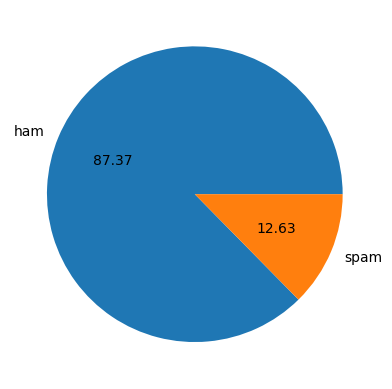

In [12]:
#Pie Chart of Ham and spam
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
#Data is imbalanced
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
#Adding new features - number of charcters
df['num_characters']=df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#Number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
#Number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
#Number of sentences
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
#Description of features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#Ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#Spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

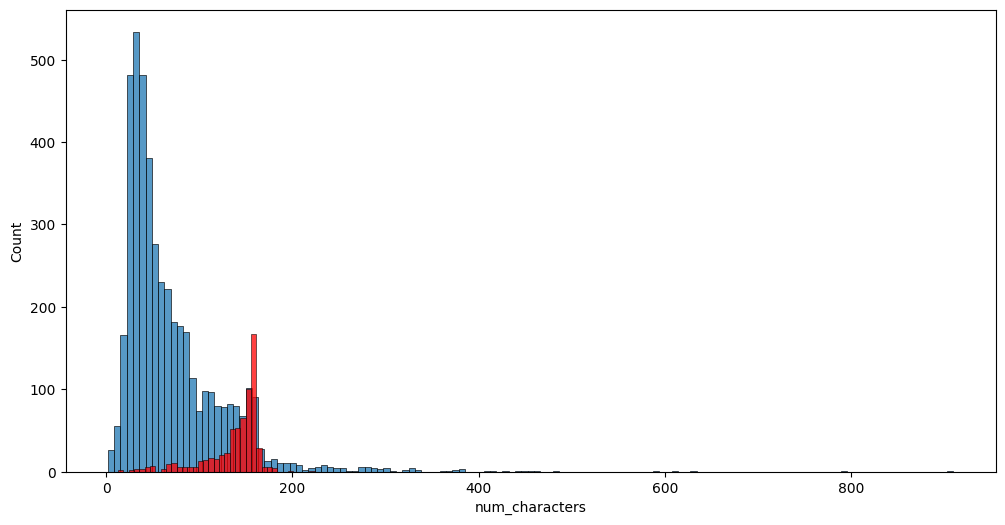

In [36]:
#Histogram plot for count of number of characters in spam and ham
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

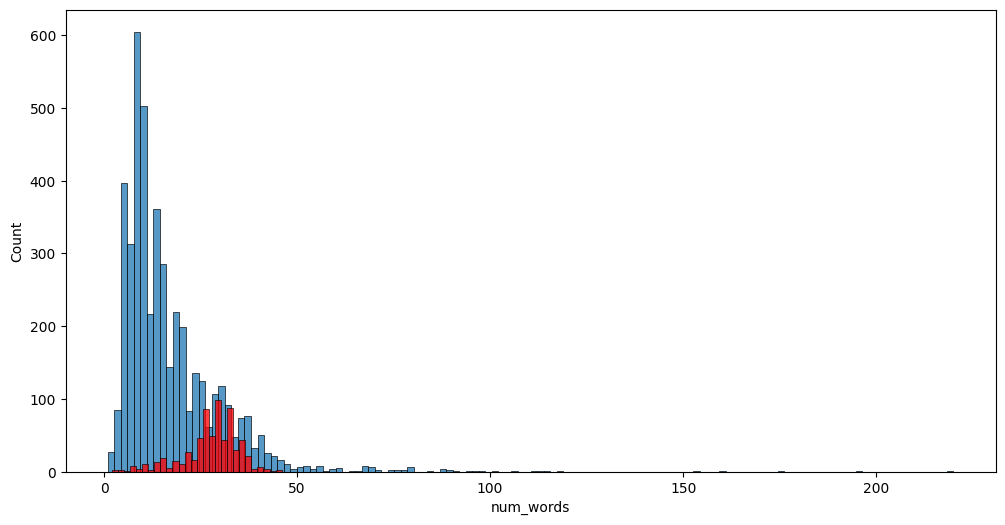

In [37]:
#Histogram plot for count of number of words in spam and ham
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

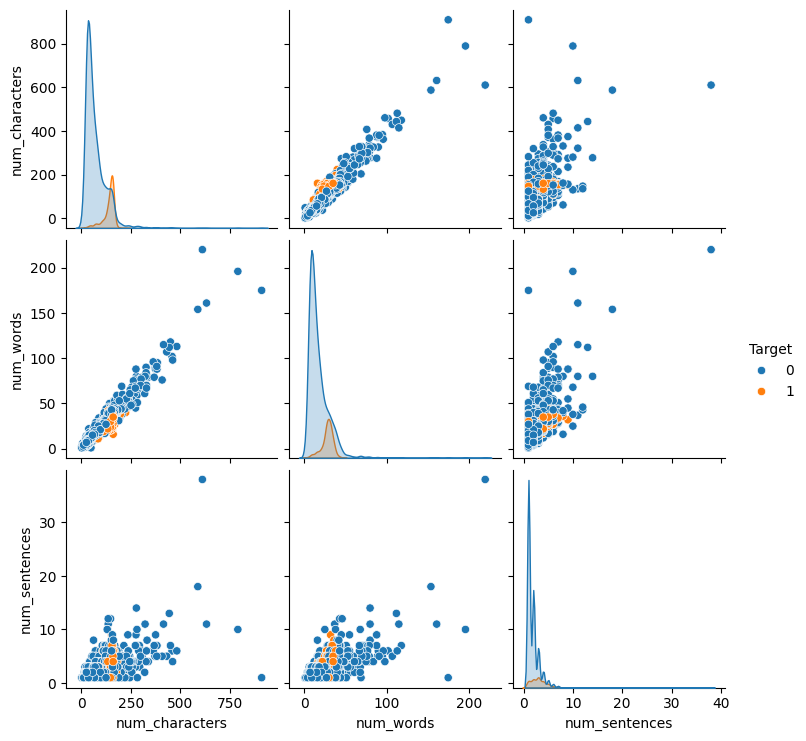

In [38]:
#Pair plot of various different features in the dataset
sns.pairplot(df,hue='Target')

<Axes: >

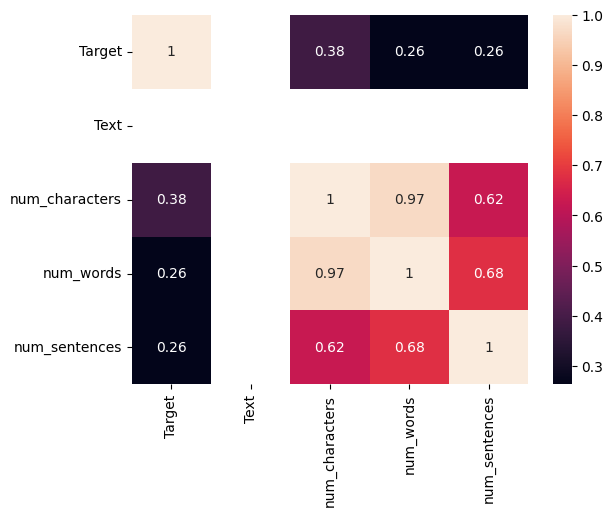

In [41]:
#Heat map of various different features in the dataset
#sns.heatmap(df.corr(),annot=True)
df_numeric = df.apply(pd.to_numeric, errors='coerce')  # Convert columns where possible
sns.heatmap(df_numeric.corr(), annot=True)

#3.Data Preprocessing
We process the newly derived dataset using the below steps

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words
*   Stemming


In [42]:
#Data processing involving tokenization,removing special characters,removing stop words,lower case and stemming.
def transform_text(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stopwords.words('english')
  import string
  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()

  text= text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)
transform_text('I loved the YT lectures on Machine Learning. How about you?')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'love yt lectur machin learn'

In [43]:
df['transformed_text'] = df['Text'].apply(transform_text)
df.head()

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


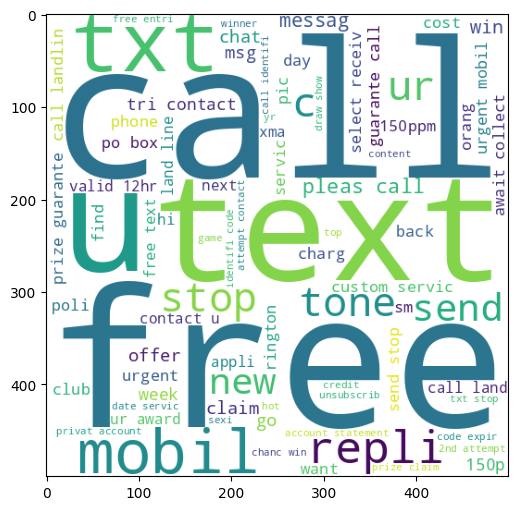

In [44]:
#Wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

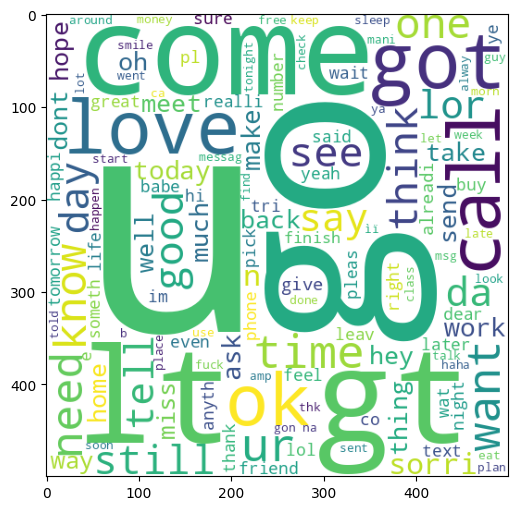

In [45]:
#Wordcloud for ham messages
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

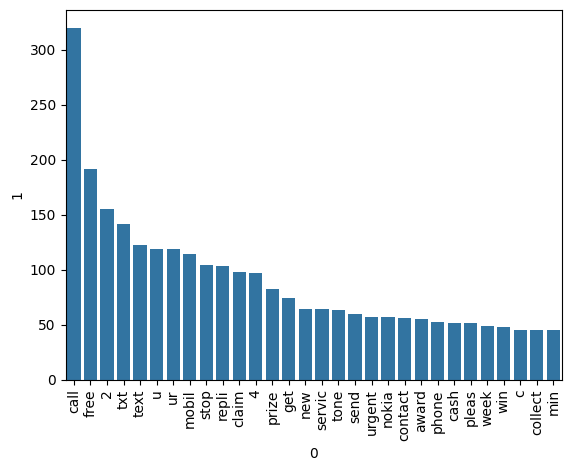

In [47]:
#Bar plot for the frequent words in ham messages along with count
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [48]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

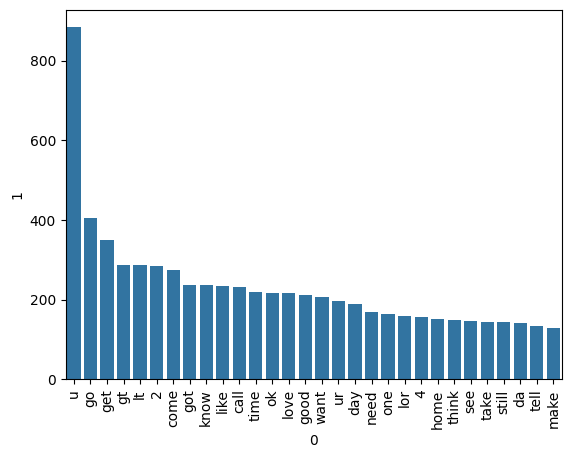

In [49]:
#Bar plot for the frequent words in spam messages along with count
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

#4.Model Building
Now we make a model using the dataset and the processed dataset. The model we choose here is Naive Bayes. We choose this because, the presicion is 100% and accuracy score is 97%.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x= tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [51]:
y = df['Target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


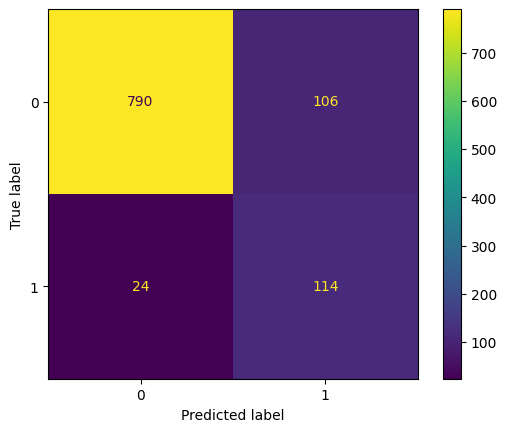

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.52      0.83      0.64       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.78      1034
weighted avg       0.91      0.87      0.89      1034



In [52]:
#Importing the Naive Bayes models and the other libraries to calculate accuracy and precision.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay,classification_report
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

cm = confusion_matrix(y_test,y_pred1)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred1))

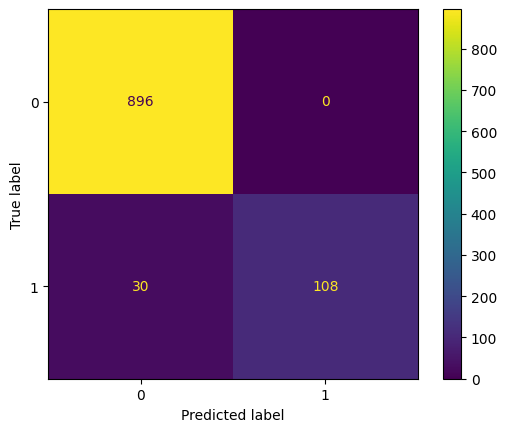

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [53]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)

cm = confusion_matrix(y_test,y_pred1)
disp = ConfusionMatrixDisplay(cm, display_labels=mnb.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred1))

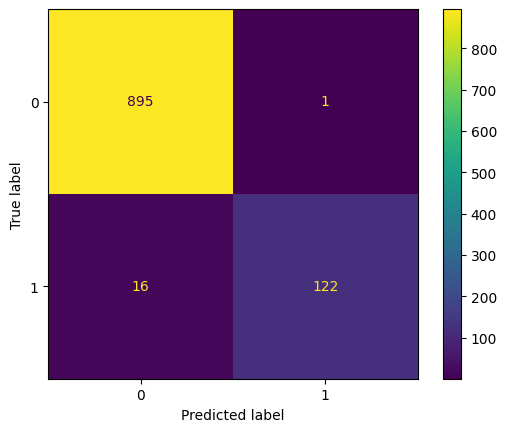

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [54]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)

cm = confusion_matrix(y_test,y_pred1)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred1))

tfidf.....->MNB
#Downloading the model to implement in PyCharm

In [55]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))